In [64]:
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



In [38]:
#ucitavanje podataka
vesti = pd.read_json("News_Category_Dataset_v2.json", lines = True)

In [39]:
vesti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [43]:
print("Broj autora : ", vesti["authors"].nunique())


Total number of articles :  198627
Total number of authors :  27893
Total number of unqiue categories :  41


In [40]:
vesti.head()


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


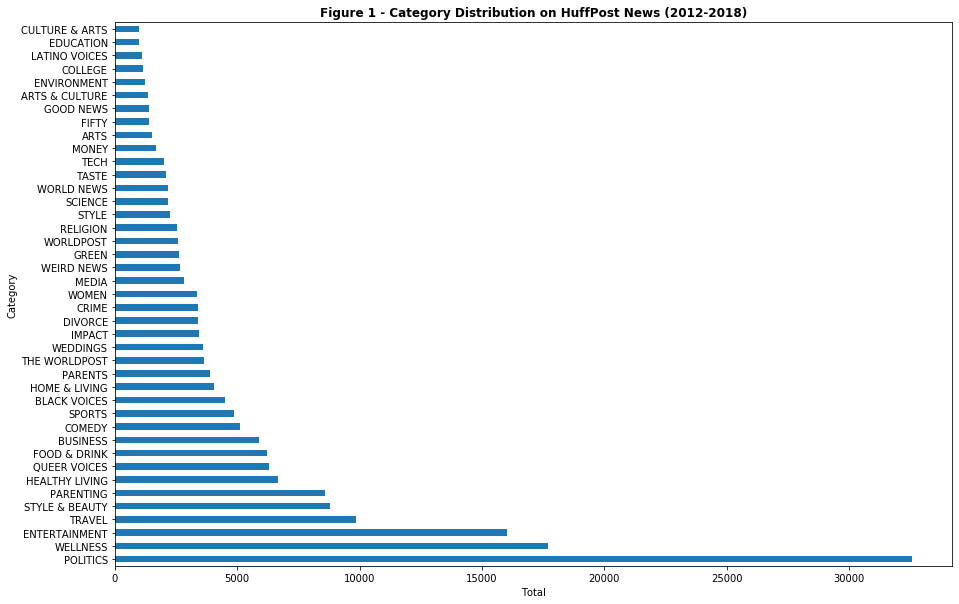

In [41]:
kategorije = vesti.groupby('category')
print("UKUPAN BROJ RALICITIH KATEGORIJA", kategorije.ngroups)
print( kategorije.size())


UKUPAN BROJ RALICITIH KATEGORIJA 41
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         

In [54]:
#neke kategorije sadrze isti tip vesti a kategorija nosi slican naziv pa vrsimo spajanje
news_articles.category = news_articles.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)
news_articles.category = news_articles.category.map(lambda x: "WORLD NEWS" if x == "WORLDPOST" else x)
news_articles.category = news_articles.category.map(lambda x: "STYLE AND BEAUTY" if x == "STYLE" else x)
news_articles.category = news_articles.category.map(lambda x: "PARENT" if x == "PARENTING" else x)
news_articles.category = news_articles.category.map(lambda x: "ARTS & CULTURE" if x == "ARTS" else x)
news_articles.category = news_articles.category.map(lambda x: "ARTS & CULTURE" if x == "CULTURE & ARTS" else x)

In [34]:
kategorije_nakon_spajanja = news_articles.groupby('category')
print("UKUPAN BROJ RAZLICITIH KATEGORIJA NAKON SPAJANJA", kategorije_nakon_spajanja.ngroups)
print( kategorije_nakon_spajanja.size())

UKUPAN BROJ RAZLICITIH KATEGORIJA NAKON SPAJANJA 37
category
ARTS & CULTURE       3736
BLACK VOICES         4469
BUSINESS             5834
COLLEGE              1119
COMEDY               4990
CRIME                3386
DIVORCE              3278
EDUCATION             957
ENTERTAINMENT       15949
ENVIRONMENT          1298
FIFTY                1354
FOOD & DRINK         5920
GOOD NEWS            1374
GREEN                2568
HEALTHY LIVING       6492
HOME & LIVING        4112
IMPACT               3324
LATINO VOICES        1121
MEDIA                2786
MONEY                1688
PARENT               8173
PARENTS              3871
POLITICS            32174
QUEER VOICES         6199
RELIGION             2422
SCIENCE              2154
SPORTS               4852
STYLE & BEAUTY       9528
STYLE AND BEAUTY     2240
TASTE                2053
TECH                 2058
TRAVEL               9645
WEDDINGS             3539
WEIRD NEWS           2664
WELLNESS            16788
WOMEN                3396
WOR

In [36]:
#BRISANJE CLANAKA SA KRATKIM NASLOVOM
print("broj clanaka: ",vesti.shape[0])
vesti = vesti[vesti['headline'].apply(lambda x: len(x.split())>6)]
print("Broj clanaka nakon brisanja: ", vesti.shape[0])

broj clanaka:  195831
Broj clanaka nakon brisanja:  167360


In [42]:
#BRISANJE DUPLIKATA
vesti.sort_values('headline',inplace=True, ascending=False)
duplikati = vesti.duplicated('headline', keep = False)
vesti = vesti[~duplikati]
print("Broj clanaka nakon brisanja: ", vesti.shape[0])

Broj clanaka nakon brisanja:  198627


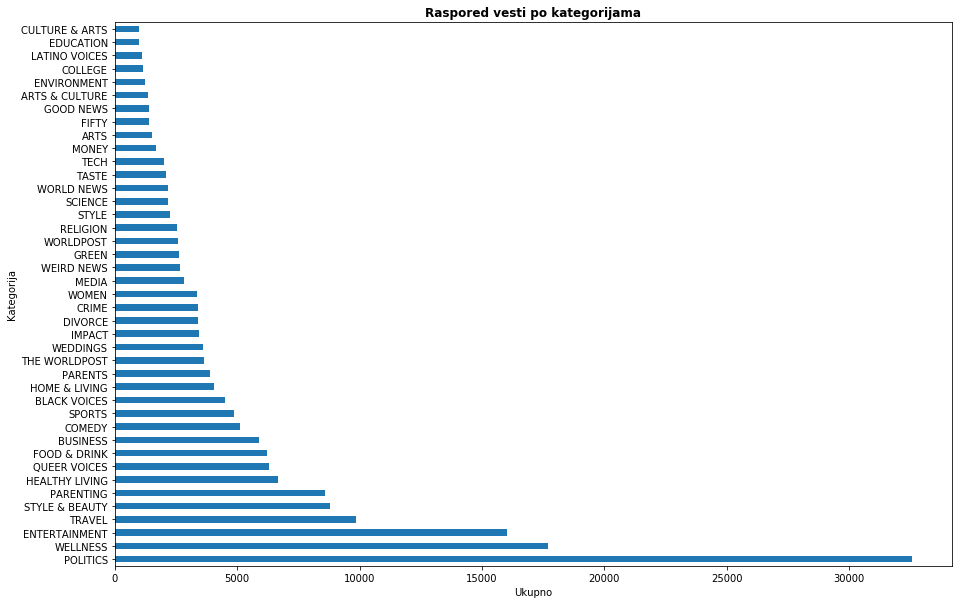

In [56]:
vesti['category'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Ukupno")
plt.ylabel("Kategorija")
plt.title("Raspored vesti po kategorijama",
          fontweight="bold", size=12);